In [1]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importing all the libraries ✅

In [2]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from itertools import combinations
import powerlaw
from random import randint
from scipy import stats
import itertools


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For the first model, we have the Erdős-Rényi model. It's defined as the random graph model, and is a mathematical model for generating random graphs. 
In this model, a graph with a fixed number of nodes N and edges E is generated by connecting the nodes randomly with probability p. Generally, there are two variants of the Erdős-Rényi model:

The G(N,p) model, where the graph has N nodes, and each pair of nodes is connected with probability p independently.
The G(N,M) model, where the graph has N nodes, and M edges are chosen uniformly at random from the set of all possible edges.


## ▶ Erdős-Rényi model : G(N,K)

Let's start by explaining exactly what i did to work on the G(N,K) variant of the Erdos-Renyi model. First, an empty graph G is created using the nx.Graph() method from the NetworkX library. N nodes are added to the graph using the G.add_nodes_from(nodes) method, where nodes is a list of integers ranging from 0 to N-1. K edges are added to the graph by repeatedly selecting two nodes at random using the random.sample(nodes, 2) method, where nodes is the list of nodes in the graph. If the two nodes are not already connected by an edge, a new edge is added between them using the G.add_edge(u, v) method. The process is repeated until K edges have been added. Finally, the function returns the generated graph G.




In [4]:
import random

def ERGNK(N, K):
    # Create an empty graph
    G = nx.Graph()
    
    # Add K edges to the graph
    edges = []
    while len(edges) < K:

        # Choose two nodes at random
        nodes = list(range(N))
        u, v = random.sample(nodes, 2)
        
        # Add the edge if it doesn't already exist
        if not G.has_edge(u, v):
            G.add_edge(u, v)
            edges.append((u, v))
    
    return G


## ▶ Erdős-Rényi model : G(N,p)

This function is indeed a bit different since, it generates a random graph using the G(N,p) model by considering every pair of nodes and adding an edge between them with probability p. This will help us get a graph with an expected number of edges equal to pN(N-1)/2, where N is the number of nodes. This expected number of edges can be used to estimate the value of p that should be used to generate a graph with a desired number of edges.

So what we did is start by creating an empty graph using the nx.Graph() method from the NetworkX library. Then creating a list of nodes ranging from 0 to N-1 using the list(range(N)) method. The nodes are added to the graph using the G.add_nodes_from(nodes) method. Following, the function enters a loop that adds edges to the graph. Inside the loop, every pair of nodes is considered using the itertools.combinations(nodes, 2) method. And for each pair of nodes, an edge is added between them with probability p using the random.random() < p condition. If the condition is true, a new edge is added using the G.add_edge(u, v) method, where u and v are the two nodes considered in the loop.
Once all pairs of nodes have been considered, the graph is returned using the return G statement.

In [43]:
import random

def ERGNP(N, p):
    # Create an empty graph
    G = nx.Graph()

    # Add N nodes to the graph
    nodes = list(range(N))
    G.add_nodes_from(nodes)

    # Add edges to the graph
    for u, v in itertools.combinations(nodes, 2):
        if random.random() < p:
            G.add_edge(u, v)

    return G


## ▶ Watts-Strogatz small-world graph 





The Watts-Strogatz model generates small-world graphs by starting with a regular ring lattice and then rewiring edges with probability p. This generates graphs that have the small-world property of high clustering coefficient and short average path length.  Therefore, the WS function we developed generates a small-world graph using the Watts-Strogatz model by first constructing a regular ring lattice with each node connected to its K nearest neighbors, and then rewiring edges with probability p. The regular ring lattice generates a highly clustered graph with a high degree of local connectivity. The rewiring step adds randomness to the graph and generates long-range connections that reduce the average path length between nodes. The degree of randomness in the graph can be controlled by adjusting the rewiring probability p.

In some cases, we wont have connected graphs, especially for small values of N and large values of K.

In [5]:
def WS(N, K, p):
    G = nx.Graph()
    nodes = [i for i in range(N)]
    G.add_nodes_from(nodes)
    
    for i in range(N):
        for j in range(1, K//2+1):
            node_idx = (i + j) % N
            G.add_edge(i, node_idx)
            
    for u, v in G.edges():
        if rd.random() < p:
            w = rd.choice(nodes)
            while G.has_edge(u, w) or u == w:
                w = rd.choice(nodes)
            G.add_edge(u, w)
            G.remove_edge(u, v)

    return G

To explain exactly the code, the first function creates an empty graph using the nx.Graph() method from the NetworkX library. It then creates a list of nodes ranging from 0 to N-1 using the list comprehension [i for i in range(N)].
The nodes are then added to the graph using the G.add_nodes_from(nodes) method.
The function enters a nested loop that adds edges to the graph according to the Watts-Strogatz model. For each node i in the graph, the function adds K/2 edges to the K nearest neighbors of i in a ring topology (this is done using the formula (i + j) % N, where N is the number of nodes and j ranges from 1 to K/2). This step generates a regular ring lattice with each node connected to its K nearest neighbors. After the ring lattice has been constructed, the function rewires each edge with probability p. For each edge (u, v) in the ring lattice, the function checks whether a new edge should be rewired using the condition rd.random() < p, where rd is the random module in Python. If the condition is true, the function selects a random node w from the list of nodes and adds an edge (u, w) to the graph, provided that the edge (u, w) does not already exist and u and w are not the same node. The function then removes the edge (u, v) from the graph.
Once all edges have been rewired, the function returns the graph using the return G statement.

## ▶ Barabasi-Albert preferential attachment model

The Barabasi-Albert (BA) algorithm is a generative model for creating complex networks with a scale-free degree distribution. The algorithm is based on the idea of preferential attachment, which means that nodes that have a high degree are more likely to attract new edges.

The algorithm starts with a small number of nodes and iteratively adds new nodes with m edges each. In each step, a new node is added to the graph and connected to m existing nodes. The existing nodes are chosen based on their degree, where nodes with a higher degree have a higher probability of being chosen. This ensures that new nodes tend to attach to well-connected nodes, leading to the emergence of hubs in the network.

In [111]:
def BA(N,m,init):
    if m>init:
        print('m must be <= init')
    G=ERGNP(init,1)
    i=init
    while i <= N:
        m_count=0
        degrees=dict(G.degree)
        degrees_n=2*len(G.edges)
        G.add_node(i)
        while m_count<m:
            rdn=rd.random()*degrees_n
            bin_start=0
            for node in degrees:
                bin_start+=degrees[node]
                if rdn < bin_start:
                    if (i,node) not in G.edges:
                        G.add_edge(i,node)
                        m_count+=1
                        break
        i+=1
    return G   

What we did to develop the code, is to start off by creating a fully connected graph with the initial number of nodes (init), where each node is connected to every other node. Then, for each new node i, m edges are added by preferential attachment, where the probability of connecting to a node j is proportional to the degree of node j (number of edges it already has). This is done by first creating a list of candidate nodes (the current nodes in the network), and then assigning a probability to each candidate based on its degree. A new node i is then connected to one of the candidate nodes according to these probabilities, and the degree of the chosen node and the degree sequence of the graph are updated accordingly. The function then returns the generated graph as an object of the NetworkX library.

##▶ Configuration model

Before writing the function of the CM, we need to generate node degrees for the model. The Configuration model is actually a way of generating random graphs with a specific degree sequence. So we first defined the function 'poisson_even' that will generate node degrees with a Poisson distribution and an even sum of degrees. And then we defined the function 'SF_even' that will help us generate node degrees with a power-law distribution and an even sum of degrees.
In fact, both functions ensure that the sum of the node degrees is even, which is a requirement for using the model to generate a graph.

In [46]:
import numpy as np
import powerlaw
from random import randint

def fisher_yates(lst):
    length = len(lst)
    for i in range(length-1, 0, -1):
        j = randint(0, i)  
        lst[i], lst[j] = lst[j], lst[i]
    return lst

def poisson_even(N, l):
    node_degrees = list(np.random.poisson(l, N))
    if np.sum(node_degrees) % 2 == 1:
        node_degrees[0] += 1
    node_degrees = np.array(node_degrees)
    return node_degrees

def SF_even(N, l):
    th = powerlaw.Power_Law(xmin=1.0, parameters=[l])
    th_gen = th.generate_random(N)
    node_degrees = list(np.floor(th_gen).astype(int))
    if np.sum(node_degrees) % 2 == 1:
        node_degrees[0] += 1
    node_degrees = np.array(node_degrees)
    return node_degrees


To develop the code, we start by checking if the sum of the node degrees is even. If it's not, the function prints an error message and returns None.
Then we create an empty graph using the NetworkX library and add nodes to the graph, one for each degree in the input list.
After, we create a list of "stubs" which represent the half-edges of the nodes. Each stub is an integer representing the index of the node it belongs to, and the list contains one stub for each edge in the graph. For example, if there are two nodes with degrees 3 and 4, the list of stubs would have 7 entries, three for the first node and four for the second node. The list of stubs is shuffled randomly using the Fisher-Yates algorithm implemented in the function rd.sample. We then iterate through the shuffled list of stubs, connecting each pair of adjacent stubs to create an edge in the graph. If a pair of stubs corresponds to the same node or an edge that already exists in the graph, it is added to a list of "bad edges".
We continue to iterate through the list of bad edges, shuffling it and trying to connect the stubs in pairs until it either runs out of bad edges or reaches a maximum number of iterations. At the end, the resulting graph is returned.

In [47]:
def CM(node_degrees):

    if np.sum(node_degrees) % 2 == 1:
        print('The sum of the node degrees must be even')
        return
    G = nx.Graph()
    G.add_nodes_from([i for i in range(len(node_degrees))])
    stubs = []
    for node, degree in enumerate(node_degrees):
        for _ in range(degree):
            stubs.append(node)
    stubs = rd.sample(stubs, len(stubs))
    bad_edges = []
    for i in range(0, len(stubs), 2):
        if stubs[i] == stubs[i+1] or (stubs[i], stubs[i+1]) in G.edges():
            bad_edges += [stubs[i], stubs[i+1]]
        else:
            G.add_edge(stubs[i], stubs[i+1])
    counter = 0
    stop = 10 
    while len(bad_edges) != 0 and counter < stop:
        bad_edges = rd.sample(bad_edges, len(bad_edges))
        new_bad_edges = []
        for i in range(0, len(bad_edges), 2):
            if bad_edges[i] == bad_edges[i+1] or (bad_edges[i], bad_edges[i+1]) in G.edges():
                new_bad_edges += [bad_edges[i], bad_edges[i+1]]
            else:
                G.add_edge(bad_edges[i], bad_edges[i+1])
        bad_edges = new_bad_edges
        counter += 1
    return G


##▶ Functions to estimate the power law exponent



The purpose behind developing the MLE function is to estimate the power law exponent of a given degree distribution using the maximum likelihood method. It actually takes a list of degrees as input and returns the estimated exponent gamma. The second MLE_kmin function is actually a variant of the MLE function that allows the user to specify a minimum degree k_min. It is actually useful when dealing with degree distributions that exhibit a truncated power law behavior, where the power law behavior is only observed for degrees greater than some threshold. In fact, the function first filters out degrees below k_min, then estimates the exponent using the maximum likelihood method on the remaining degrees, and returns the estimated exponent gamma.

In [6]:
def MLE(degrees):
    k_min = min(degrees)
    log_likelihood = sum([np.log(k/k_min - 0.5) for k in degrees])
    gamma = 1 + len(degrees) / log_likelihood
    return gamma
def MLE_kmin(degrees, k_min):
    degrees = [k for k in degrees if k >= k_min]
    log_likelihood = sum([np.log(k/k_min - 0.5) for k in degrees])
    gamma = 1 + len(degrees) / log_likelihood
    return gamma

In this implementation, the function takes in two arrays x and y, representing the independent and dependent variables respectively, and calculates the slope b1 and y-intercept b0 of the regression line that best fits the data using the least squares method. The function returns the equation of the regression line in the form of a string.

In [7]:
def linear_regression(x, y):     
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    
    b1_num = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    b1_den = sum((x[i] - x_mean)**2 for i in range(n))
    b1 = b1_num / b1_den
    
    b0 = y_mean - (b1 * x_mean)
    
    reg_line = f"y = {b0:.3f} + {b1:.3f}x"
    
    return b0, b1, reg_line


We then define the regr function. It actually takes a single array of degree values as input and performs a logarithmic binning of the degrees. It then calculates the probability of the degrees falling within each bin and performs a linear regression on the non-null probabilities. The resulting regression coefficients and line equation are returned. We had to use this function to estimate the power law exponent of a degree distribution using the method of maximum likelihood estimation with a binned data approach.





In [8]:
def regr(degrees):
    k_min = min(degrees)
    k_max = max(degrees)
    log_degrees = np.log10(degrees)
    
    x = np.linspace(np.log10(k_min), np.log10(k_max+1), 20)
    
    count, _ = np.histogram(log_degrees, bins=x)
    n = sum(degrees)
    p = count/n
    
    non_null_indexes = [b for b in range(len(p)) if p[b] > 0]
    x_non_null = x[1:][non_null_indexes]
    log_p_non_null = np.log10(p[non_null_indexes])
    (B0, B1, reg_line) = linear_regression(x_non_null, log_p_non_null)
    
    return (B0, B1, reg_line)


Now it is time to estimate the power law exponent (gamma) of the graph G based on its degree sequence. First, we extracts the degree sequence from the graph G and computes the maximum likelihood estimation (MLE) of gamma for k_min >= 1 and k_min > 5 using the MLE() function. Then, we compute the regression coefficient and the corresponding gamma estimate using the regr() function. The regression coefficient is then computed by dividing the slope of the linear regression of the log-binned degree distribution by -1, and gamma is estimated as 1 minus the regression coefficient. By using gamma, we can compare and evaluate the robustness and accuracy of the different methods.

In [9]:
def gamma_est(G):
    degrees = list(dict(G.degree()).values())
    
    gamma_mle_1 = MLE(degrees)
    print('MLE gamma estimation, with k_min >= 1:', gamma_mle_1)
    
    degrees_5 = [d for d in degrees if d > 5]
    gamma_mle_5 = MLE(degrees_5)
    print('MLE gamma estimation, with k_min > 5:', gamma_mle_5)
    
    regr_coeff = regr(degrees)[1]
    gamma_regr = 1 - regr_coeff
    print('Regression coefficient:', regr_coeff, ', gamma:', gamma_regr)


##▶ Functions to plot the vizualisations 


In [10]:
def plotgraph(name, title):
    degrees = [val for (node, val) in name.degree()]

    fig = plt.figure(figsize=(14, 7))
    gs = fig.add_gridspec(nrows=1, ncols=2, wspace=0.1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

    nx.draw(name, ax=ax1)
    plt.title(title)

    ax2.hist(degrees, bins=20, density=True)

    return fig, ax1, ax2

In [11]:
def plothist(name, title):
    degrees = [val for (node, val) in name.degree()]

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot()
    ax.hist(degrees, bins=30, density=True)
    plt.title(title)

    return fig, ax

In [12]:
def plotgraph_scalefree(name, title):
    degrees = list(dict(name.degree()).values())
    fig = plt.figure(figsize=(14, 7))
    gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig, wspace=0.1)
    
    ax1 = fig.add_subplot(gs[0, 0])
    plt.title(title)
    nx.draw(name)
    
    ax2 = fig.add_subplot(gs[0, 1])
    bins = np.logspace(np.log10(np.min(degrees)), np.log10(np.max(degrees)), num=30)
    ax2.set_xscale('log')
    ax2.hist(degrees, bins=bins, density=True, log=True)
    
    return fig

In [13]:
def plothist_scalefree(name, title):
    deg = list(dict(name.degree()).values())
    
    fig = plt.figure(figsize=(14,7))
    plt.title(title)
    
    gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig, wspace=0.1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_title('lin-lin')
    ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
    ax2.set_title('log-log')
    
    bins = np.logspace(np.log10(np.min(deg)), np.log10(np.max(deg)), num=30)
    ax1.hist(deg, bins=30, density=True)
    ax2.hist(deg, bins=bins, density=True, log=True)
    ax2.set_xscale('log')
    
    return


##▶ Result of our analysis

Networks generated for the selected models, with different sizes N (e.g. N=50, 100, 1000) and for different values of the parameters of the models:

ER: different values of "K" for G(N,K), or of "p" for G(N,p), such that e.g. <k>=3, 6, 10

WS: different values of <k> and "p", including p=0, e.g. p=0.0, 0.1, 0.2, 0.5, 0.9, 1.0, and <k>=2, 4, 6

BA: different values of "m" (number of edges that each new nodes forms with the existing nodes), e.g. m=1, 2, 5

CM: different degree distributions: Poisson (ER), e.g. <k>=2, 4; power-law (SF) with different exponents, e.g. gamma=2.2, 2.7, 3.5

## ERGNP & ERGNK 

With N = 50, avg_degree = 10

In [56]:
N=50
avg_degree=10
K=N*(avg_degree)/2
p=2*K/(N*(N-1))
ERP_50_10=ERGNP(N,p)
ERK_50_10=ERGNK(N,K)
nx.write_pajek(ERP_50_10, "/content/drive/MyDrive/A2-networks/ERP_50_10")
nx.write_pajek(ERK_50_10, "/content/drive/MyDrive/A2-networks/ERK_50_10")

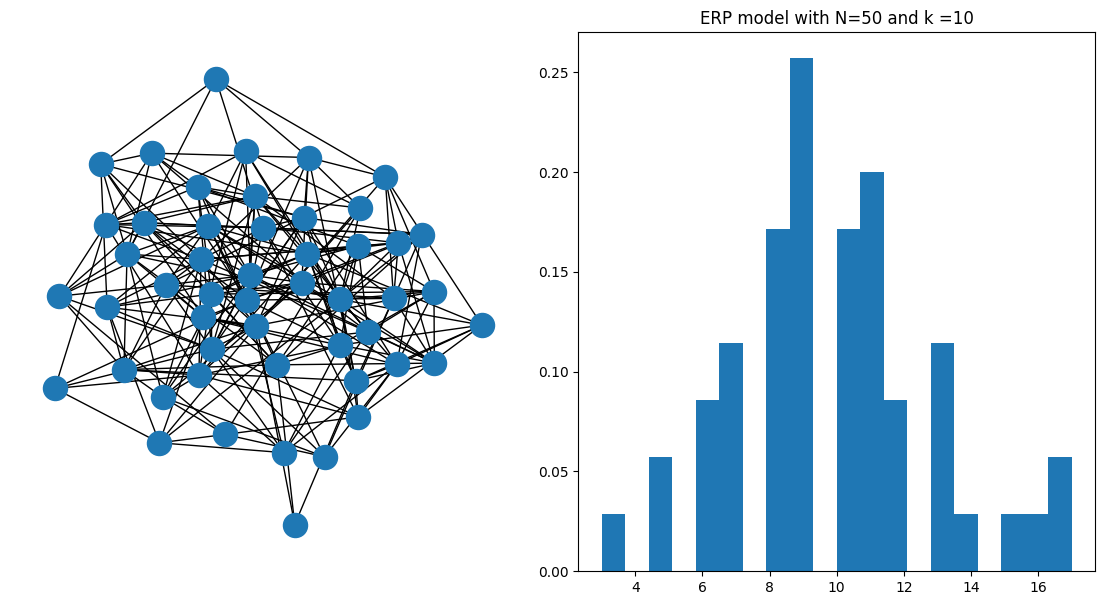

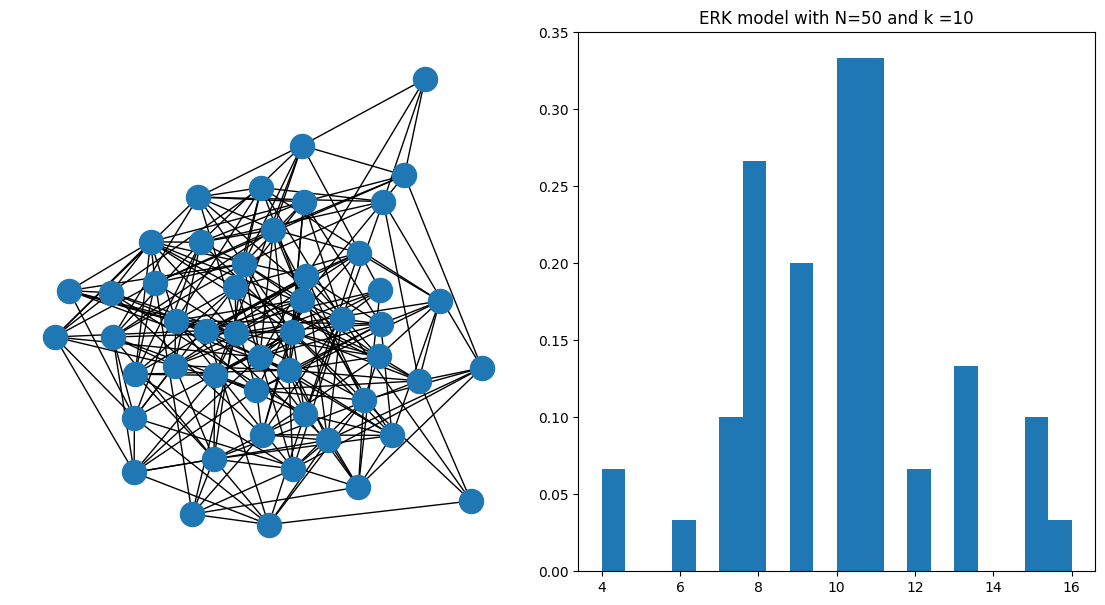

In [57]:

plotgraph(ERP_50_10,
    'ERP model with N=50 and k =10')
plt.savefig('/content/drive/MyDrive/A2-networks/ERP_50_10.png')
plotgraph(ERK_50_10,
    'ERK model with N=50 and k =10')
plt.savefig('/content/drive/MyDrive/A2-networks/ERK_50_10.png')

With N = 100, avg_degree = 6

In [58]:
N=100
avg_degree=6
K=N*(avg_degree)/2
p=2*K/(N*(N-1))
ERP_100_6=ERGNP(N,p)
ERK_100_6=ERGNK(N,K)
nx.write_pajek(ERP_100_6, "/content/drive/MyDrive/A2-networks/ERP_100_6")
nx.write_pajek(ERK_100_6, "/content/drive/MyDrive/A2-networks/ERK_100_6")

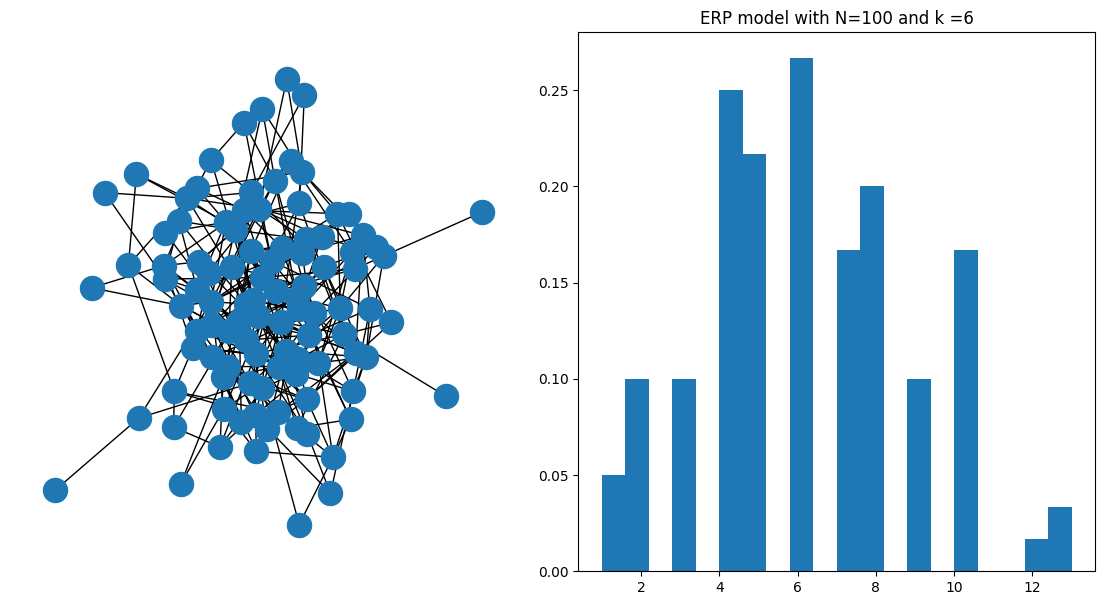

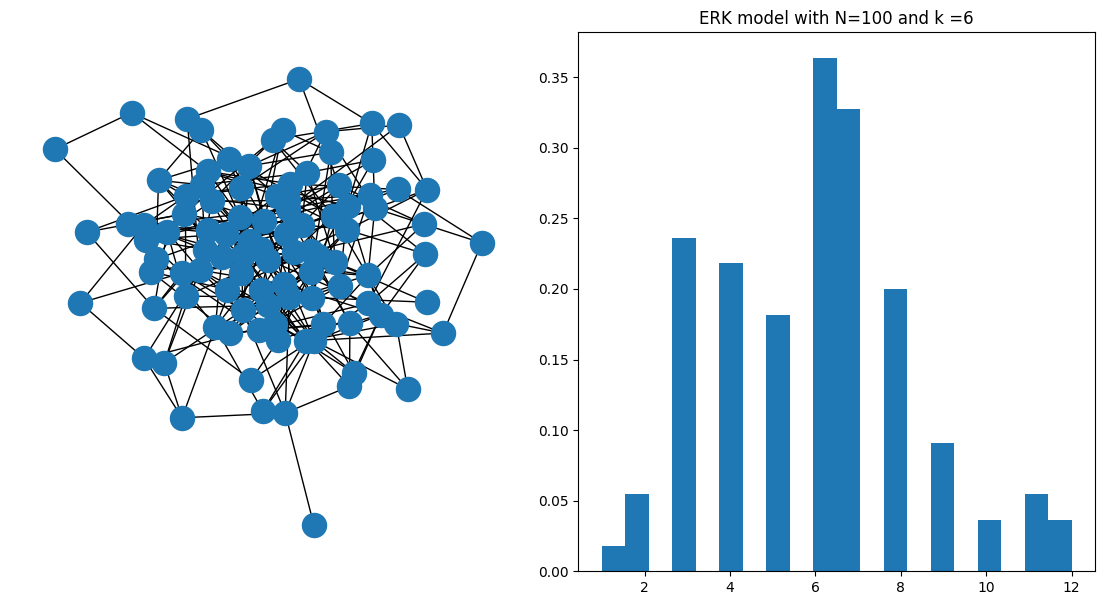

In [59]:
plotgraph(ERP_100_6,
    'ERP model with N=100 and k =6')
plt.savefig('/content/drive/MyDrive/A2-networks/ERP_100_6.png')
plotgraph(ERK_100_6,
    'ERK model with N=100 and k =6')
plt.savefig('/content/drive/MyDrive/A2-networks/ERK_100_6.png')

With N = 1000, avg_degree = 3

In [60]:
N=1000
avg_degree=3
K=N*(avg_degree)/2
p=2*K/(N*(N-1))
ERP_1000_3=ERGNP(N,p)
nx.write_pajek(ERP_1000_3, "/content/drive/MyDrive/A2-networks/ERP_1000_3")

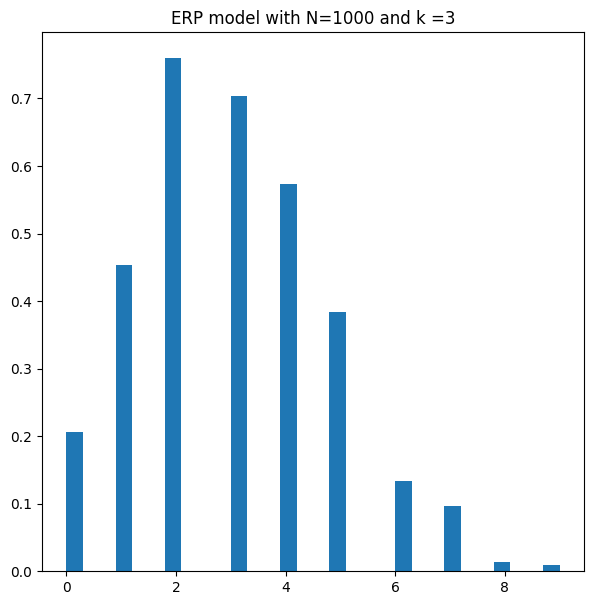

In [61]:
plothist(ERP_1000_3,
          'ERP model with N=1000 and k =3')
plt.savefig('/content/drive/MyDrive/A2-networks/ERP_1000_3.png')

With N = 10000, avg_degree = 3

In [62]:
N=10000
avg_degree=3
K=N*(avg_degree)/2
p=2*K/(N*(N-1))
ERP_10000_3=ERGNP(N,p)

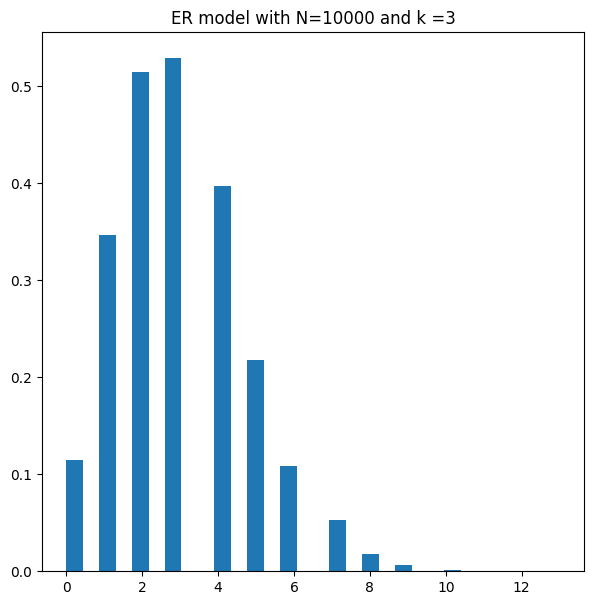

In [63]:
plothist(ERP_10000_3,
    'ER model with N=10000 and k =3')
plt.savefig('/content/drive/MyDrive/A2-networks/ERP_10000_3.png')

### WS Plots 

N = 50, k = 10, p = 0.0

In [64]:
N=50
k=10 
p=0.0
WS_50_10_0=WS(N,k,p)
nx.write_pajek(WS_50_10_0, "/content/drive/MyDrive/A2-networks/WS_50_10_0")

In [65]:
C=nx.cluster.average_clustering(WS_50_10_0)
L=nx.average_shortest_path_length(WS_50_10_0)
print('The average path length & clustering: {:0.3f}, {:0.3f}'. format(L,C))

The average path length & clustering: 2.959, 0.667


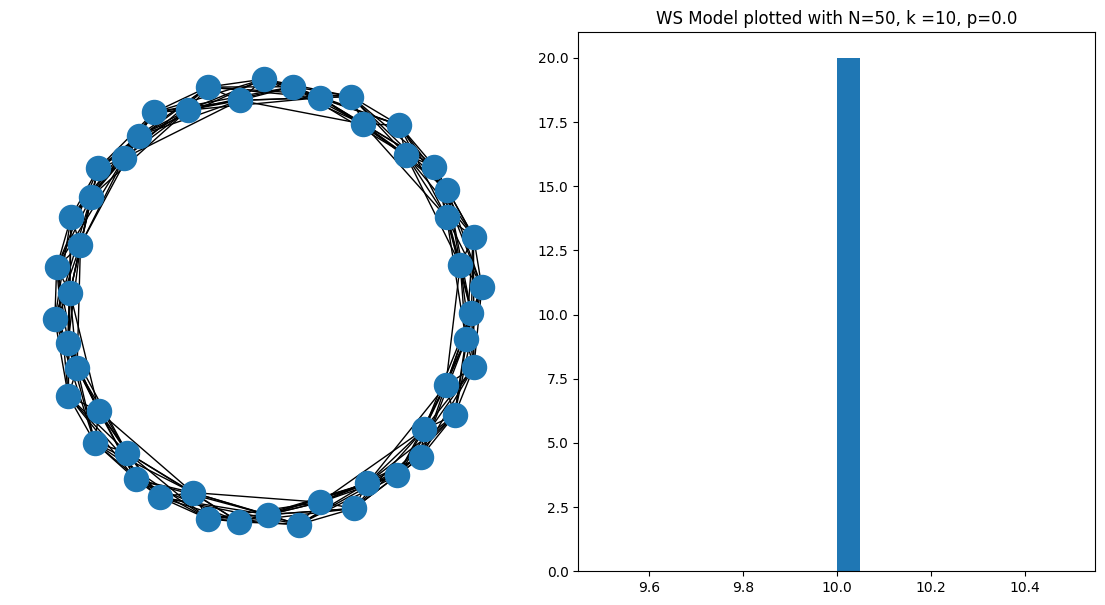

In [66]:
plotgraph(WS_50_10_0,
    'WS Model plotted with N=50, k =10, p=0.0')
plt.savefig('/content/drive/MyDrive/A2-networks/WS_50_10_0.png')

N = 100, k = 8, p = 0.1

In [67]:
N=100
k=8 
p=0.1
WS_100_8_01=WS(N,k,p)
nx.write_pajek(WS_100_8_01, "/content/drive/MyDrive/A2-networks/WS_100_8_01")

In [68]:
C=nx.cluster.average_clustering(WS_100_8_01)
L=nx.average_shortest_path_length(WS_100_8_01)
print('The average path length & clustering: {:0.3f}, {:0.3f}'. format(L,C))

The average path length & clustering: 2.958, 0.455


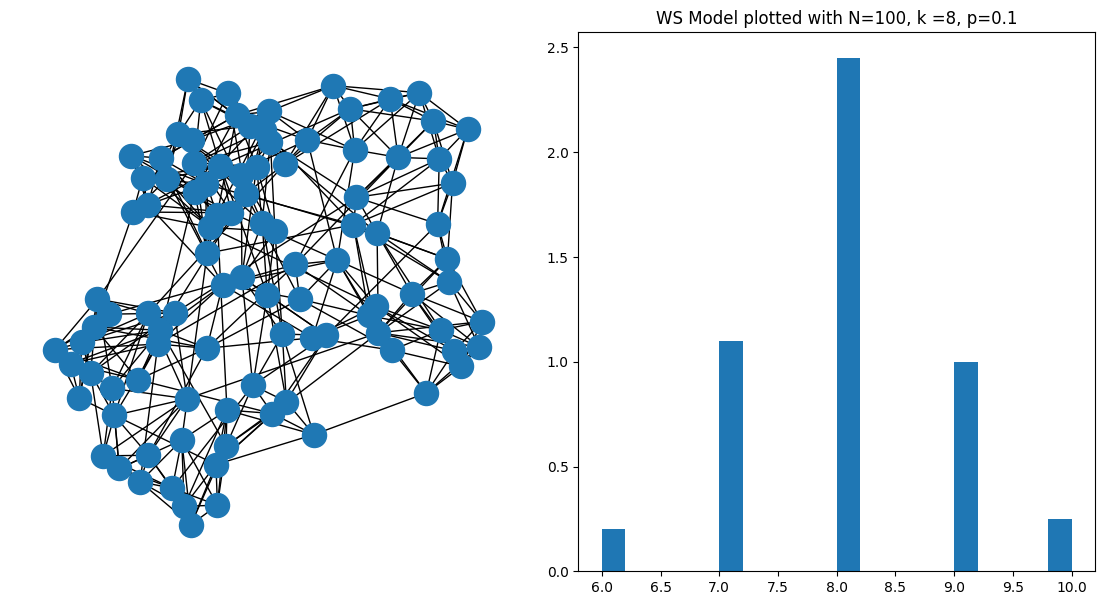

In [69]:
plotgraph(WS_100_8_01,
    'WS Model plotted with N=100, k =8, p=0.1')
plt.savefig('/content/drive/MyDrive/A2-networks/WS_100_8_01.png')

N = 100, k = 6, p = 0.2

In [70]:
N=100
k=6 
p=0.2
WS_100_6_02=WS(N,k,p)
nx.write_pajek(WS_100_6_02, "/content/drive/MyDrive/A2-networks/WS_100_6_02")

In [71]:
C=nx.cluster.average_clustering(WS_100_6_02)
L=nx.average_shortest_path_length(WS_100_6_02)
print('The average path length & clustering: {:0.3f}, {:0.3f}'. format(L,C))

The average path length & clustering: 3.230, 0.339


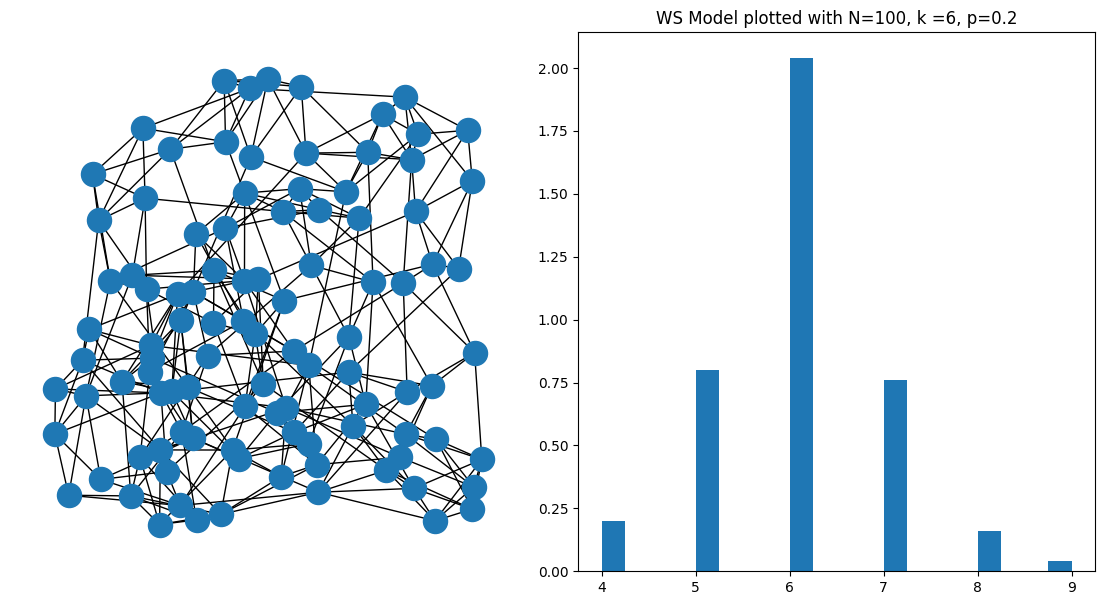

In [72]:
plotgraph(WS_100_6_02,
    'WS Model plotted with N=100, k =6, p=0.2')
plt.savefig('/content/drive/MyDrive/A2-networks/WS_100_6_02.png')

N = 100, k = 6, p = 0.5

In [73]:
N=100
k=6
p=0.5
WS_100_6_05=WS(N,k,p)
nx.write_pajek(WS_100_6_05, "/content/drive/MyDrive/A2-networks/WS_100_6_05")

In [74]:
C=nx.cluster.average_clustering(WS_100_6_05)
L=nx.average_shortest_path_length(WS_100_6_05)
print('The average path length & clustering: {:0.3f}, {:0.3f}'. format(L,C))

The average path length & clustering: 2.806, 0.108


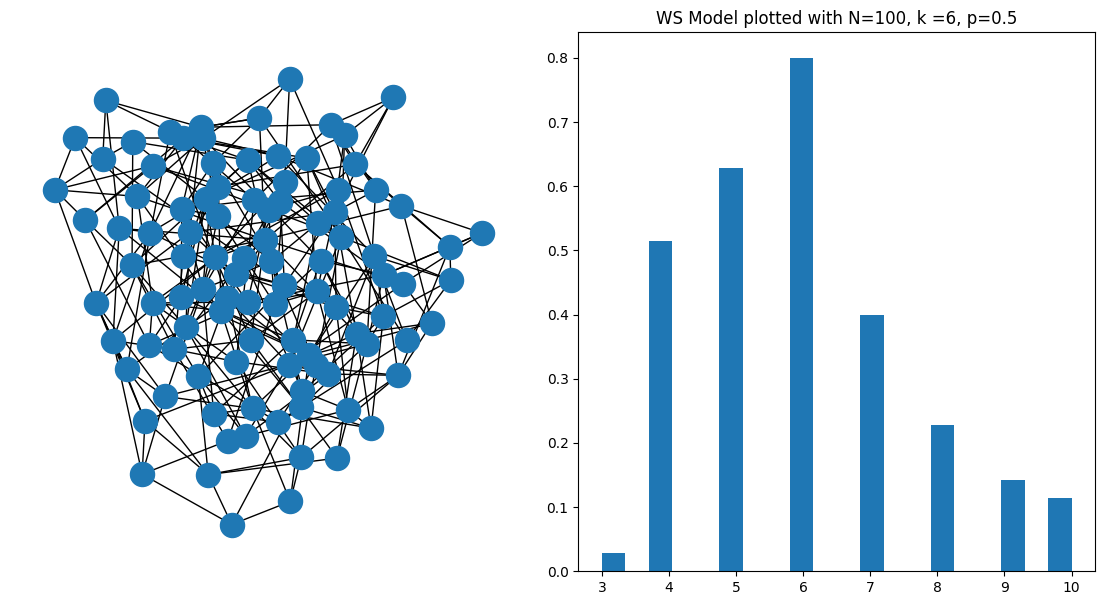

In [75]:
plotgraph(WS_100_6_05,
    'WS Model plotted with N=100, k =6, p=0.5')
plt.savefig('/content/drive/MyDrive/A2-networks/WS_100_6_05.png')

N = 100, k = 6, p = 0.9

In [76]:
import networkx as nx

N = 100
k = 6
p = 0.9

WS_100_6_09 = nx.connected_watts_strogatz_graph(n=N, k=k, p=p)
nx.write_pajek(WS_100_6_09, "/content/drive/MyDrive/A2-networks/WS_100_6_09")

In [77]:
C=nx.cluster.average_clustering(WS_100_6_09)
L=nx.average_shortest_path_length(WS_100_6_09)
print('The average path length & clustering: {:0.3f}, {:0.3f}'. format(L,C))

The average path length & clustering: 2.726, 0.053


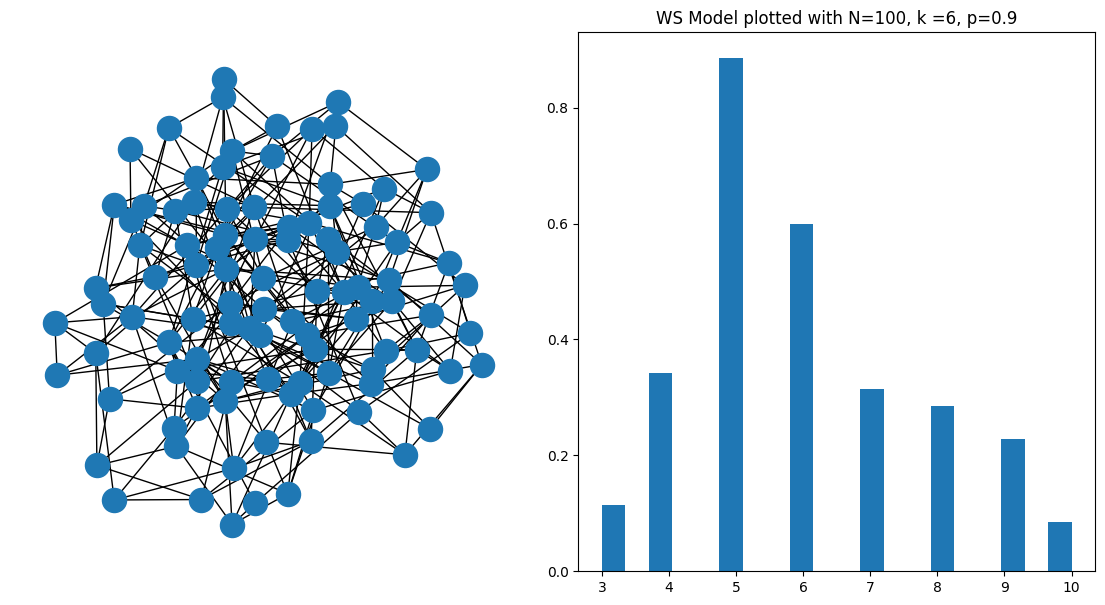

In [78]:
plotgraph(WS_100_6_09,
    'WS Model plotted with N=100, k =6, p=0.9')
plt.savefig('/content/drive/MyDrive/A2-networks/WS_100_6_09.png')

N = 100, k = 6, p = 1

In [79]:
N=100
k=6 
p=1

WS_100_6_1 = nx.connected_watts_strogatz_graph(n=N, k=k, p=p)

nx.write_pajek(WS_100_6_1, "/content/drive/MyDrive/A2-networks/WS_100_6_1")

In [80]:
C=nx.cluster.average_clustering(WS_100_6_1)
L=nx.average_shortest_path_length(WS_100_6_1)
print('The average path length & clustering: {:0.3f}, {:0.3f}'. format(L,C))

The average path length & clustering: 2.720, 0.058


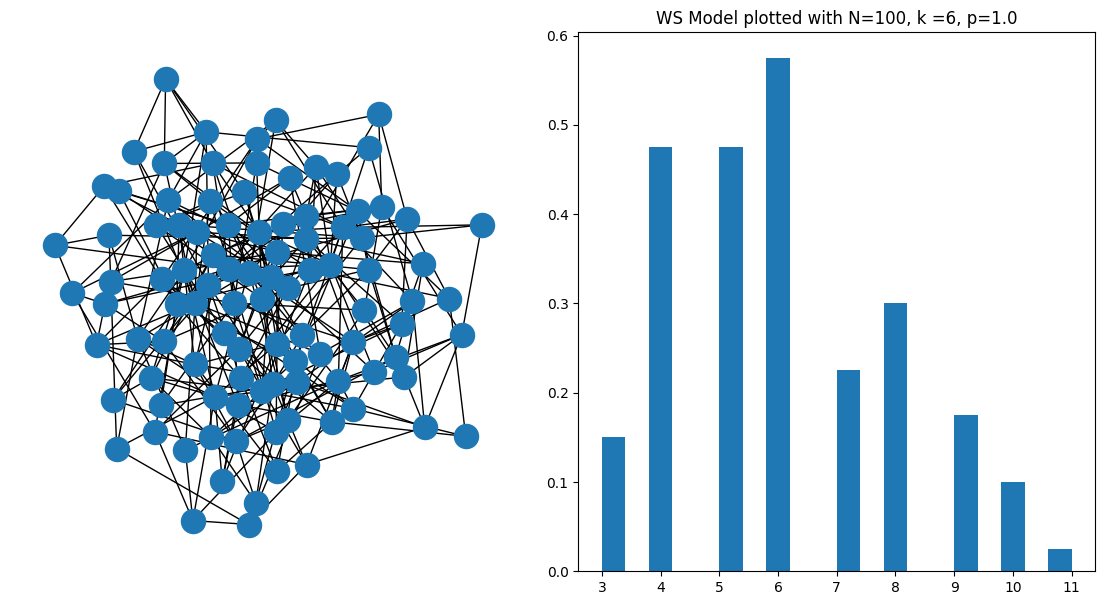

In [81]:
plotgraph(WS_100_6_1,
    'WS Model plotted with N=100, k =6, p=1.0')
plt.savefig('/content/drive/MyDrive/A2-networks/WS_100_6_1.png')

N = 100, k = 6, p = 2

In [82]:
N=100
k=6 
p=2

WS_100_6_2 = nx.connected_watts_strogatz_graph(n=N, k=k, p=p)

nx.write_pajek(WS_100_6_2, "/content/drive/MyDrive/A2-networks/WS_100_6_2")

In [83]:
C=nx.cluster.average_clustering(WS_100_6_2)
L=nx.average_shortest_path_length(WS_100_6_2)
print('The average path length & clustering: {:0.3f}, {:0.3f}'. format(L,C))

The average path length & clustering: 2.733, 0.058


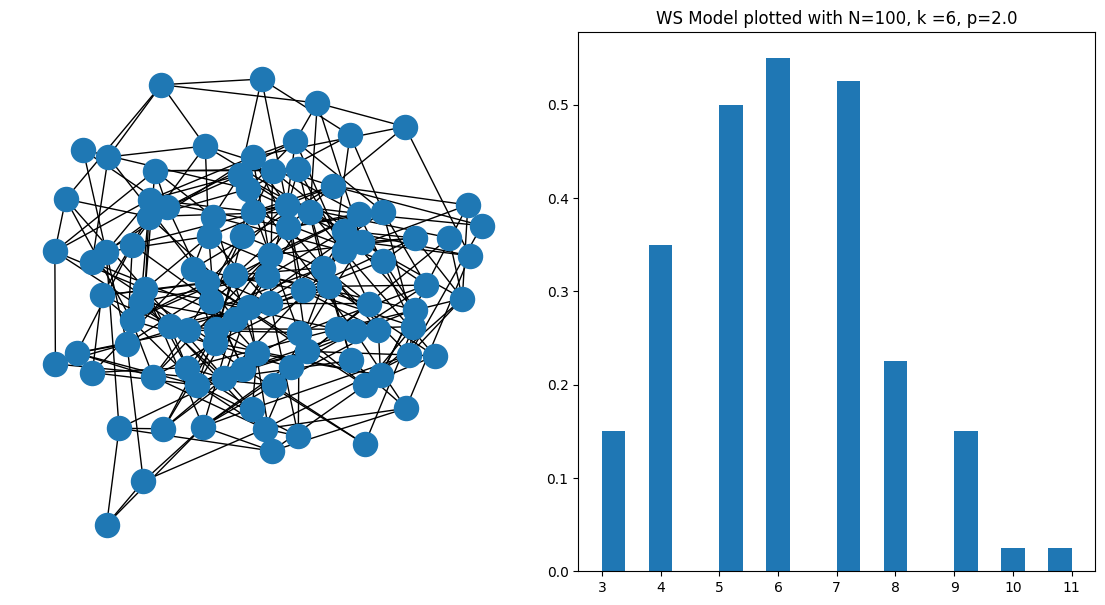

In [84]:
plotgraph(WS_100_6_2,
    'WS Model plotted with N=100, k =6, p=2.0')
plt.savefig('/content/drive/MyDrive/A2-networks/WS_100_6_2.png')

N = 1000, k = 4, p = 0.2

In [85]:
N=1000
k=4 
p=0.2

WS_1000_4_02 = nx.connected_watts_strogatz_graph(n=N, k=k, p=p)

nx.write_pajek(WS_1000_4_02, "/content/drive/MyDrive/A2-networks/WS_1000_4_02")

In [86]:
C=nx.cluster.average_clustering(WS_1000_4_02)
L=nx.average_shortest_path_length(WS_1000_4_02)
print('The average path length & clustering: {:0.3f}, {:0.3f}'. format(L,C))

The average path length & clustering: 6.876, 0.264


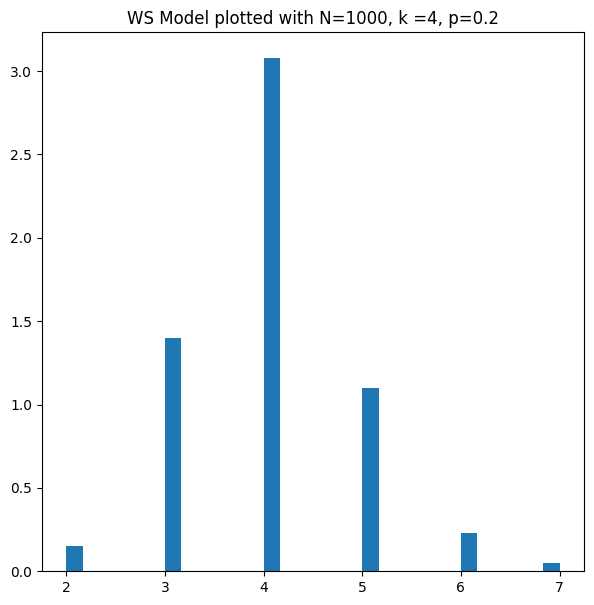

In [87]:
plothist(WS_1000_4_02,
    'WS Model plotted with N=1000, k =4, p=0.2')
plt.savefig('/content/drive/MyDrive/A2-networks/WS_1000_4_02.png')

N = 10000, k = 4, p = 0.2

In [14]:
N=10000
k=4 
p=0.2

WS_10000_4_02 = nx.connected_watts_strogatz_graph(n=N, k=k, p=p)


In [15]:
C=nx.cluster.average_clustering(WS_10000_4_02)
L=nx.average_shortest_path_length(WS_10000_4_02)
print('The average path length & clustering: {:0.3f}, {:0.3f}'. format(L,C))

The average path length & clustering: 9.598, 0.267


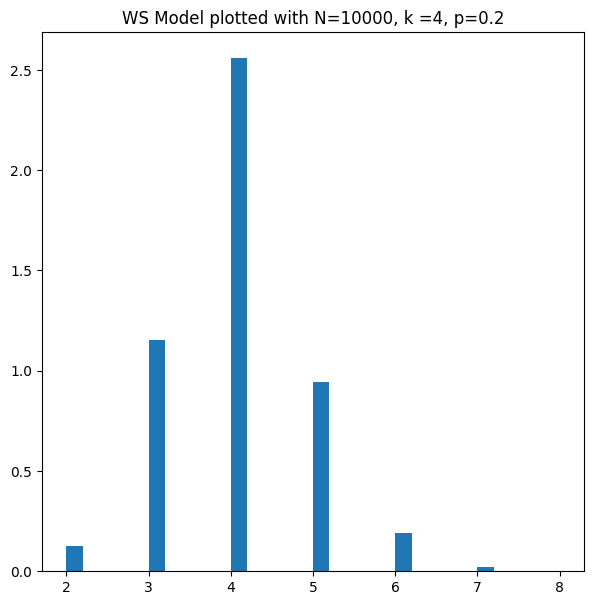

In [16]:
plothist(WS_10000_4_02,
    'WS Model plotted with N=10000, k =4, p=0.2')
plt.savefig('/content/drive/MyDrive/A2-networks/WS_10000_4_02.png')

N = 10000, k = 4, p = 0.9

In [90]:
N=10000
k=4 
p=0.9

WS_10000_4_02 = nx.connected_watts_strogatz_graph(n=N, k=k, p=p)


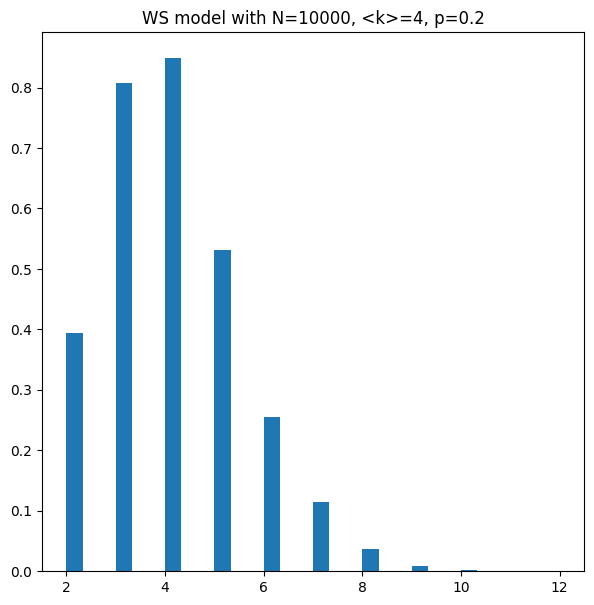

In [91]:
plothist(WS_10000_4_02,
    'WS model with N=10000, <k>=4, p=0.2')
plt.savefig('/content/drive/MyDrive/A2-networks/WS_10000_4_02.png')

###BA Plots

N = 100, m = 1, init = 5

In [92]:
N=100
m=1
init=5
BA_100_1_5=BA(N,m,init)
nx.write_pajek(BA_100_1_5, "/content/drive/MyDrive/A2-networks/BA_100_1_5")

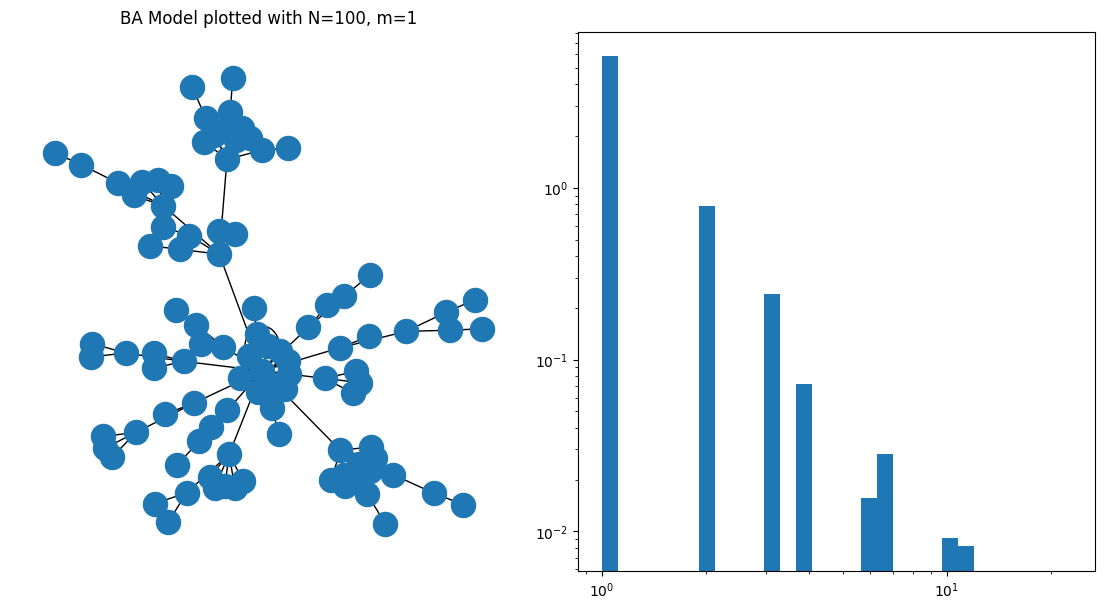

In [93]:
plotgraph_scalefree(BA_100_1_5, 
             'BA Model plotted with N=100, m=1')
plt.savefig('/content/drive/MyDrive/A2-networks/BA_100_1_5.png')

N = 100, m = 2, init = 5

In [94]:
N=100
m=2
init=5 
BA_100_2_5=BA(N,m,init)
nx.write_pajek(BA_100_2_5, "/content/drive/MyDrive/A2-networks/BA_100_2_5")

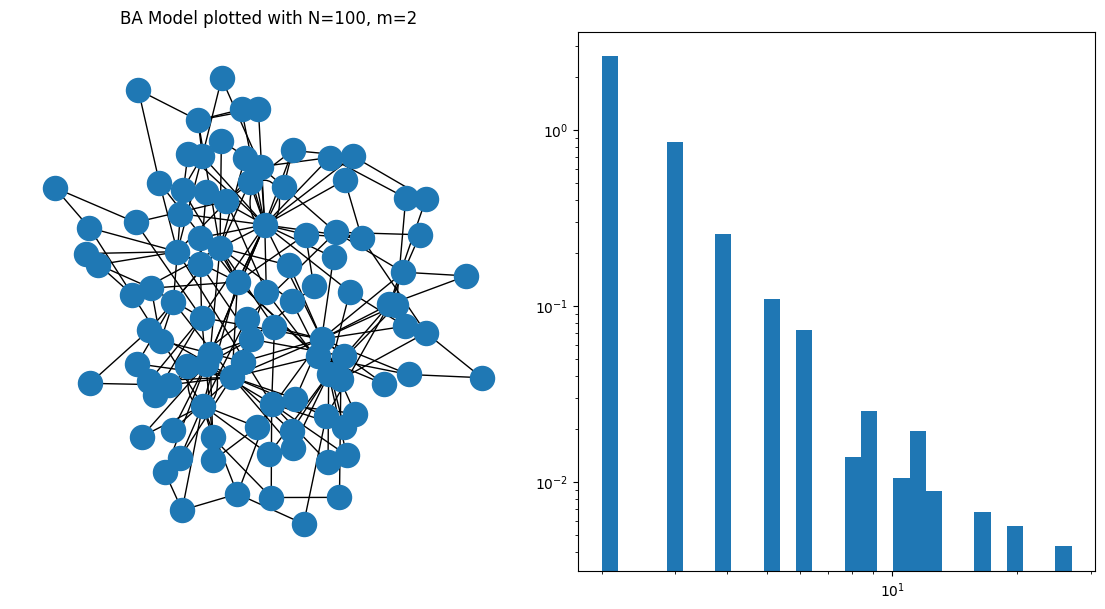

In [95]:
plotgraph_scalefree(BA_100_2_5, 
             'BA Model plotted with N=100, m=2')
plt.savefig('/content/drive/MyDrive/A2-networks/BA_100_2_5.png')

N = 100, m = 5, init = 5

In [96]:
N=100
m=5
init=5
BA_100_5_5=BA(N,m,init)
nx.write_pajek(BA_100_5_5, "/content/drive/MyDrive/A2-networks/BA_100_5_5")

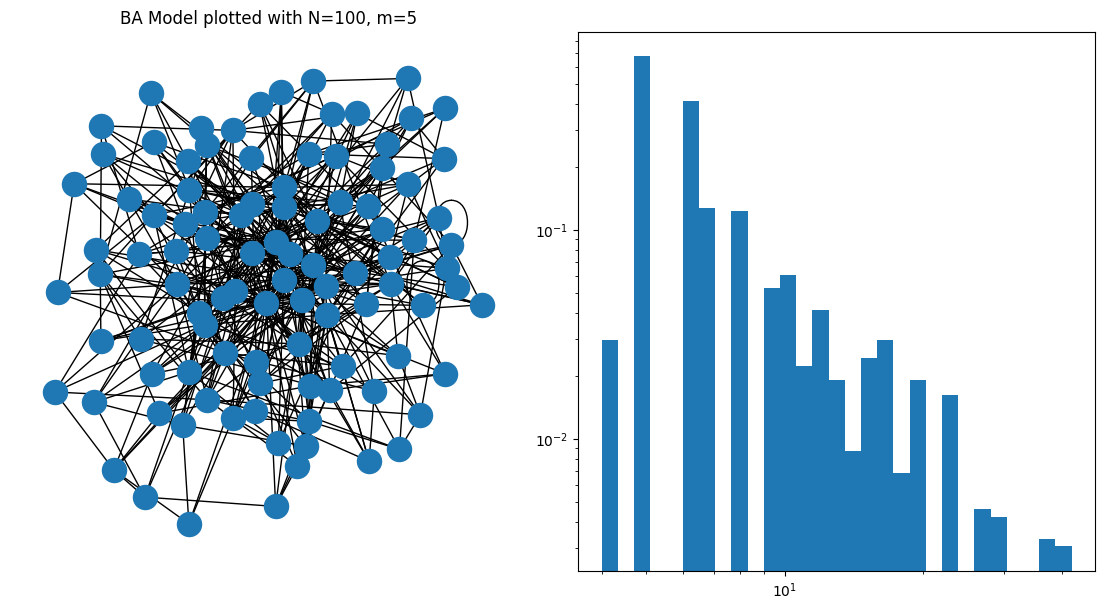

In [97]:
plotgraph_scalefree(BA_100_5_5, 
             'BA Model plotted with N=100, m=5')
plt.savefig('/content/drive/MyDrive/A2-networks/BA_100_5_5.png')

N = 100, m = 10, init = 15

In [98]:
N=100
m=10
init=15 
BA_100_10_15=BA(N,m,init)
nx.write_pajek(BA_100_10_15, "/content/drive/MyDrive/A2-networks/BA_100_10_15")

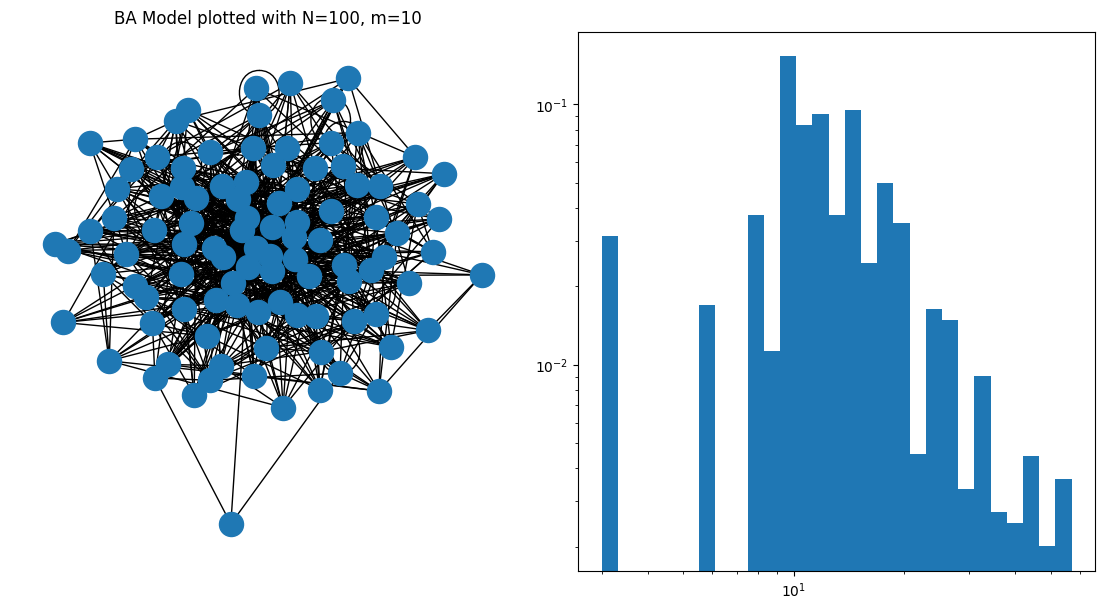

In [99]:
plotgraph_scalefree(BA_100_10_15, 
             'BA Model plotted with N=100, m=10')
plt.savefig('/content/drive/MyDrive/A2-networks/BA_100_10_15.png')

N = 1000, m = 10, init = 15

In [100]:
N=1000
m=10
init=15 
BA_1000_10_15=BA(N,m,init)
nx.write_pajek(BA_1000_10_15, "/content/drive/MyDrive/A2-networks/BA_1000_10_15")

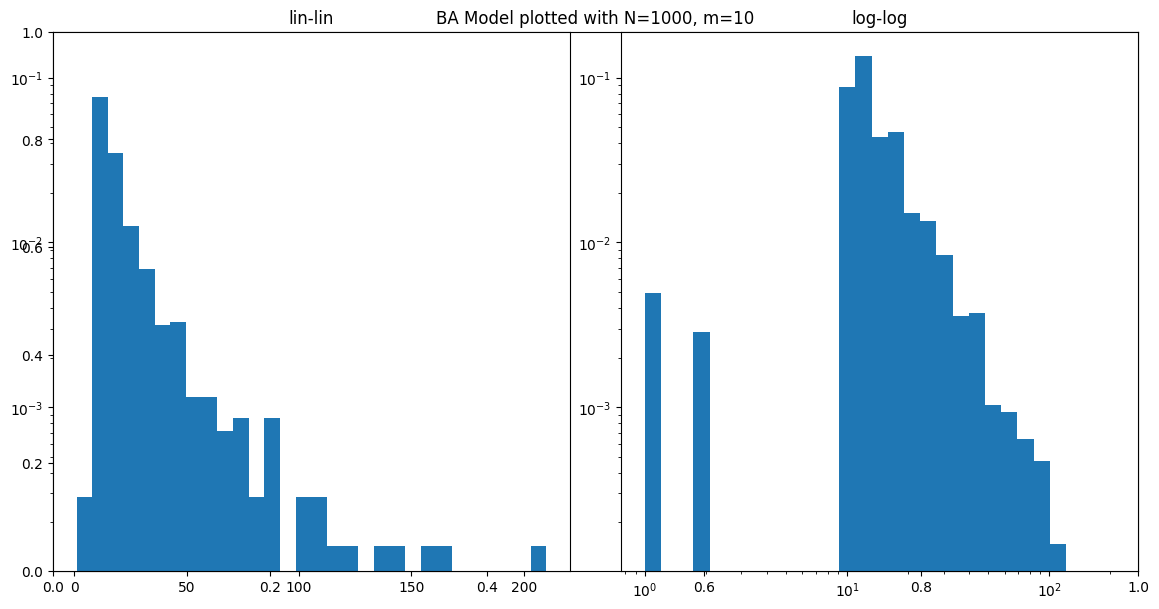

In [101]:
plothist_scalefree(BA_1000_10_15, 
          'BA Model plotted with N=1000, m=10')
plt.savefig('/content/drive/MyDrive/A2-networks/BA_1000_10_15.png')

In [102]:
gamma_est(BA_1000_10_15)

MLE gamma estimation, with k_min >= 1: 1.3621592443899648
MLE gamma estimation, with k_min > 5: 15.472241921935835
Regression coefficient: 0.13325590451408 , gamma: 0.86674409548592


N = 1000, m = 1, init = 15

In [103]:
N=1000
m=1
init=15 
BA_1000_1_15=BA(N,m,init)
nx.write_pajek(BA_1000_1_15, "/content/drive/MyDrive/A2-networks/BA_1000_1_15")

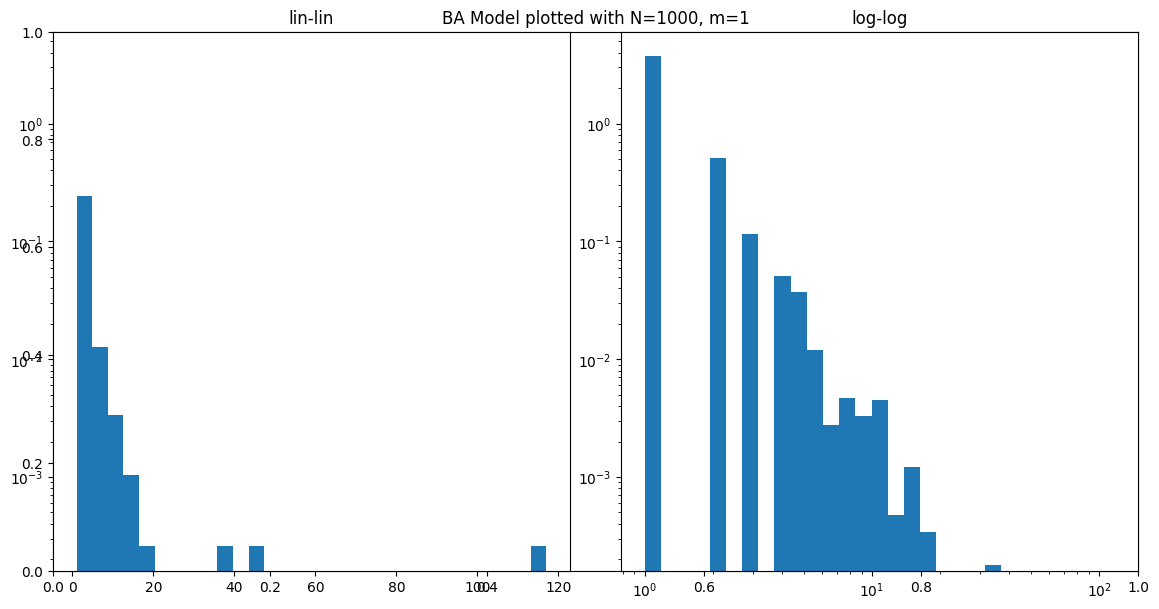

In [104]:
plothist_scalefree(BA_1000_1_15, 
          'BA Model plotted with N=1000, m=1')
plt.savefig('/content/drive/MyDrive/A2-networks/BA_1000_1_15.png')

In [105]:
gamma_est(BA_1000_1_15)

MLE gamma estimation, with k_min >= 1: -5.134536661289406
MLE gamma estimation, with k_min > 5: 22.789833595369615
Regression coefficient: -1.518786907438163 , gamma: 2.5187869074381632


N = 10000, m = 1, init = 5

In [112]:
N=10000
m=1
init=5 
BA_10000_1_5=BA(N,m,init)

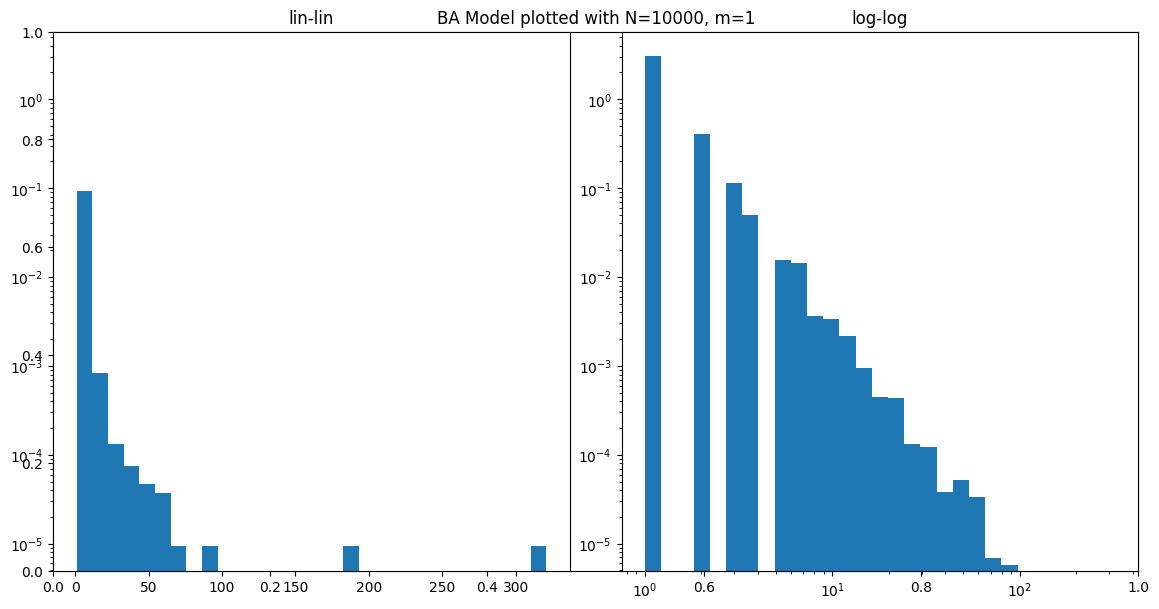

In [113]:
plothist_scalefree(BA_10000_1_5, 
          'BA Model plotted with N=10000, m=1')
plt.savefig('/content/drive/MyDrive/A2-networks/BA_10000_1_5.png')

In [114]:
gamma_est(BA_10000_1_5)

MLE gamma estimation, with k_min >= 1: -5.056991820408545
MLE gamma estimation, with k_min > 5: 26.148303180830407
Regression coefficient: -1.6557410373594104 , gamma: 2.6557410373594106


N = 10000, m = 2, init = 5

In [115]:
N=10000
m=2
init=5 
BA_10000_2_5=BA(N,m,init)

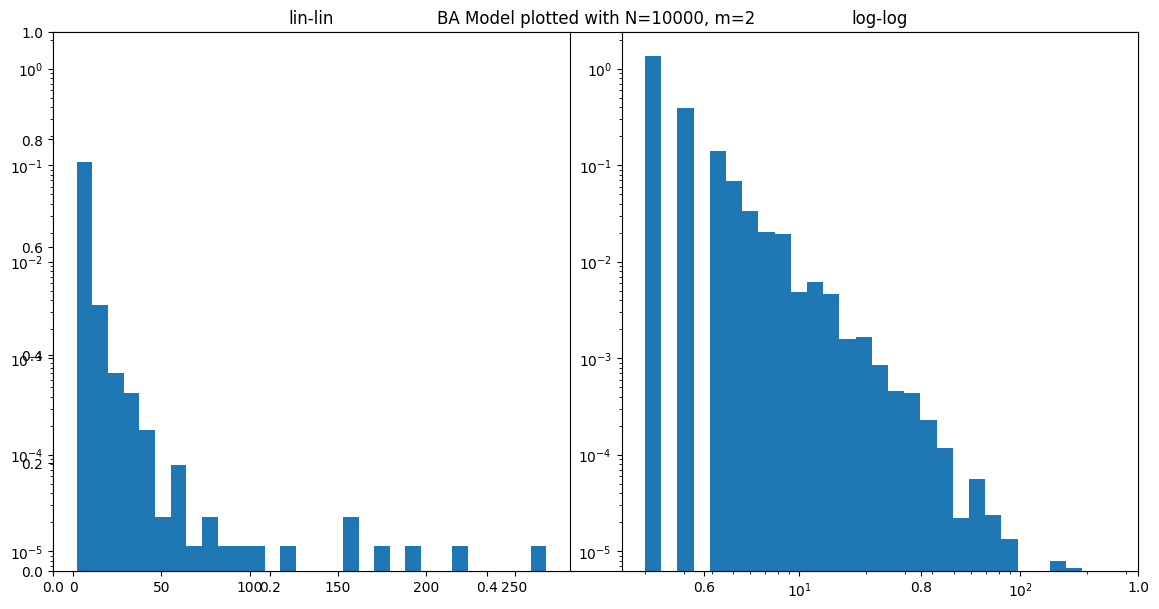

In [116]:
plothist_scalefree(BA_10000_2_5, 
          'BA Model plotted with N=10000, m=2')
plt.savefig('/content/drive/MyDrive/A2-networks/BA_10000_2_5.png')

In [117]:
gamma_est(BA_10000_2_5)

MLE gamma estimation, with k_min >= 1: -15.845815594727863
MLE gamma estimation, with k_min > 5: 27.28226886512761
Regression coefficient: -1.7496750578403992 , gamma: 2.749675057840399


N = 10000, m = 5, init = 5

In [143]:
N=10000
m=5
init=5 
BA_10000_5_5=BA(N,m,init)

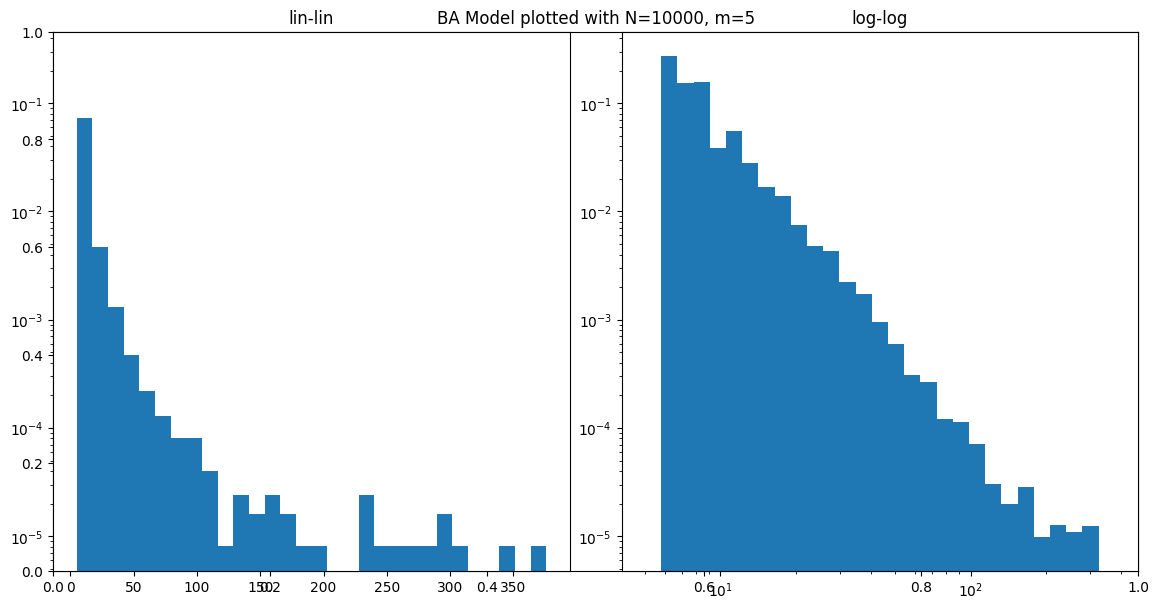

In [144]:
plothist_scalefree(BA_10000_5_5, 
          'BA Model plotted with N=10000, m=5')
plt.savefig('/content/drive/MyDrive/A2-networks/BA_10000_5_5.png')

In [145]:
gamma_est(BA_10000_5_5)

MLE gamma estimation, with k_min >= 1: 61.81810496895024
MLE gamma estimation, with k_min > 5: 34.70117484095401
Regression coefficient: -1.7831462914426661 , gamma: 2.783146291442666


N = 10000, m = 10, init = 15

In [118]:
N=10000
m=10
init=15 
BA_10000_10_15=BA(N,m,init)

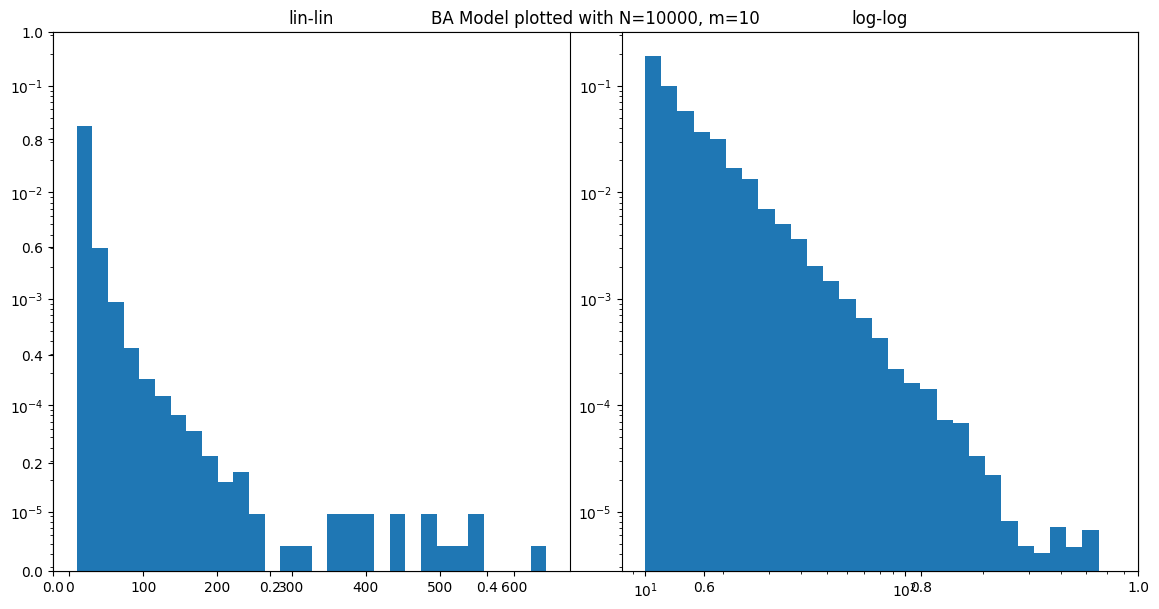

In [119]:
plothist_scalefree(BA_10000_10_15, 
          'BA Model plotted with N=10000, m=10')
plt.savefig('/content/drive/MyDrive/A2-networks/BA_10000_10_15.png')

In [120]:
gamma_est(BA_10000_10_15)

MLE gamma estimation, with k_min >= 1: 20.485749677853907
MLE gamma estimation, with k_min > 5: 20.485749677853907
Regression coefficient: -1.8488573439809641 , gamma: 2.8488573439809644


### CM Poisson Plots

N = 100, avg_degree = 2

In [121]:
N=100
avg_degree=2
poisson_degrees=poisson_even(N, avg_degree)
CM_Poisson_100_2=CM(poisson_degrees)
nx.write_pajek(CM_Poisson_100_2, "/content/drive/MyDrive/A2-networks/CM_Poisson_100_2")

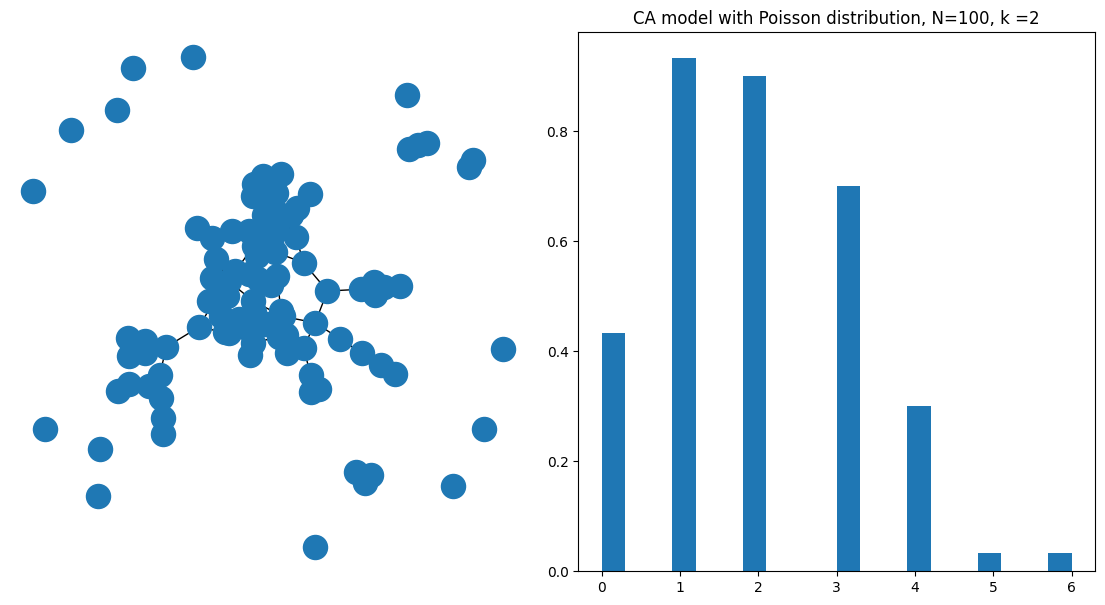

In [122]:
plotgraph(CM_Poisson_100_2,
          'CA model with Poisson distribution, N=100, k =2')
plt.savefig('/content/drive/MyDrive/A2-networks/CM_Poisson_100_2')

N = 1000, avg_degree = 4

In [123]:
N=1000
avg_degree=4
poisson_degrees=poisson_even(N, avg_degree)
CM_Poisson_1000_4=CM(poisson_degrees)
nx.write_pajek(CM_Poisson_1000_4, "/content/drive/MyDrive/A2-networks/CM_Poisson_1000_4")

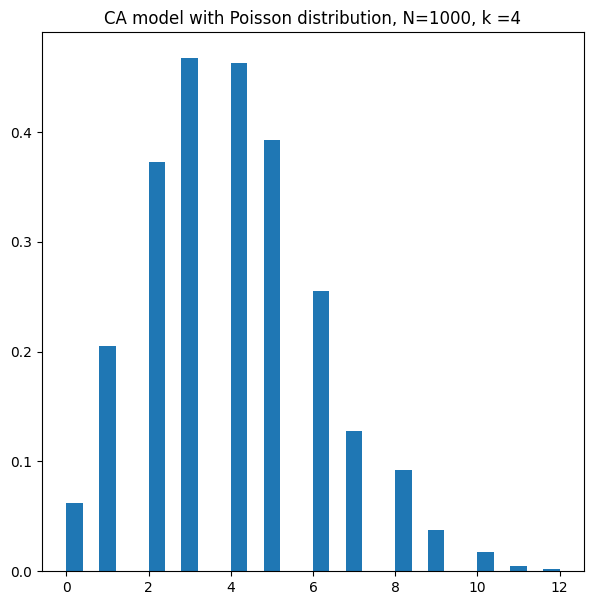

In [124]:
plothist(CM_Poisson_1000_4,
          'CA model with Poisson distribution, N=1000, k =4')
plt.savefig('/content/drive/MyDrive/A2-networks/CM_Poisson_1000_4')

N = 10000, avg_degree = 4

In [125]:
N=10000
avg_degree=4
poisson_degrees=poisson_even(N, avg_degree)
CM_Poisson_10000_4=CM(poisson_degrees)
nx.write_pajek(CM_Poisson_10000_4, "/content/drive/MyDrive/A2-networks/CM_Poisson_10000_4")

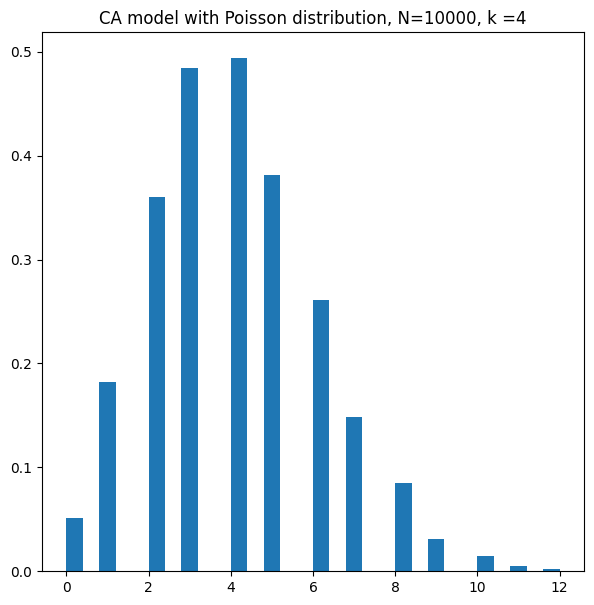

In [126]:
plothist(CM_Poisson_10000_4,
          'CA model with Poisson distribution, N=10000, k =4')
plt.savefig('/content/drive/MyDrive/A2-networks/CM_Poisson_10000_4')

###CM Scale Free Plots

N = 100, gamma = 2

In [127]:
N=100
gamma=2
node_degrees=SF_even(N, gamma)
CM_SF_100_2=CM(node_degrees)
nx.write_pajek(CM_SF_100_2, "/content/drive/MyDrive/A2-networks/CM_SF_100_2")

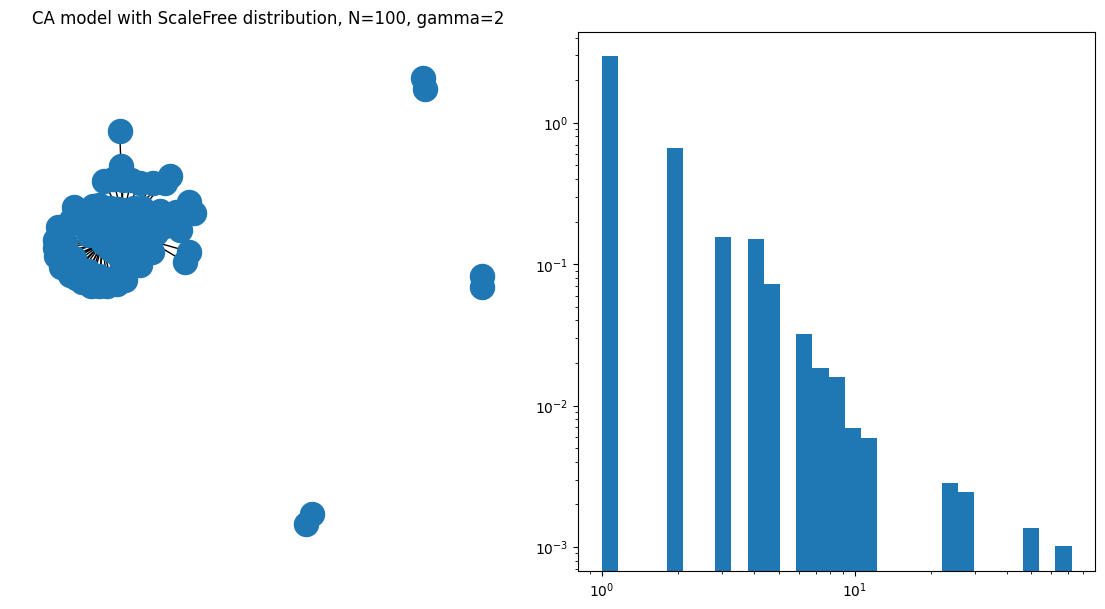

In [128]:
plotgraph_scalefree(CM_SF_100_2,
          'CA model with ScaleFree distribution, N=100, gamma=2')
plt.savefig('/content/drive/MyDrive/A2-networks/CM_SF_100_2')

In [129]:
print('gamma: ', gamma)
gamma_est(CM_SF_100_2)

gamma:  2
MLE gamma estimation, with k_min >= 1: 4.065544943597324
MLE gamma estimation, with k_min > 5: 3.8277832601928585
Regression coefficient: -0.9822775436210208 , gamma: 1.982277543621021


N = 1000, gamma = 2.2

In [130]:
N=1000
gamma=2.2
node_degrees=SF_even(N, gamma)
CM_SF_1000_22=CM(node_degrees)
nx.write_pajek(CM_SF_1000_22, "/content/drive/MyDrive/A2-networks/CM_SF_1000_22")

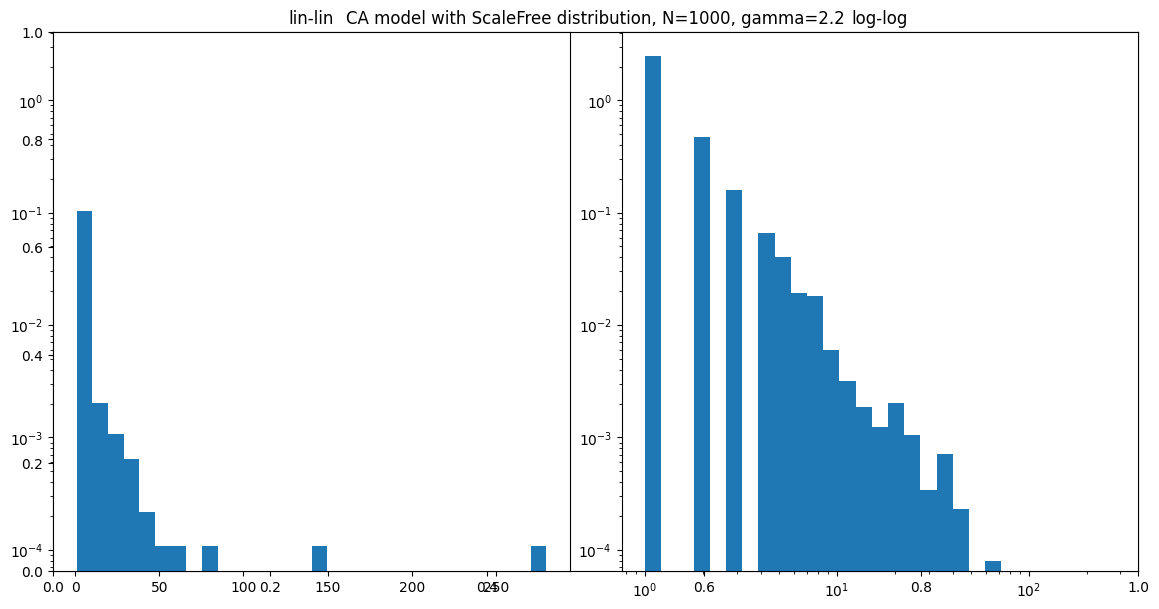

In [131]:
plothist_scalefree(CM_SF_1000_22,
          'CA model with ScaleFree distribution, N=1000, gamma=2.2')
plt.savefig('/content/drive/MyDrive/A2-networks/CM_SF_1000_22')

In [132]:
print('gamma: ', gamma)
gamma_est(CM_SF_1000_22)

gamma:  2.2
MLE gamma estimation, with k_min >= 1: 6.984923012512734
MLE gamma estimation, with k_min > 5: 5.090084942686498
Regression coefficient: -1.2224734675221713 , gamma: 2.222473467522171


N = 10000, gamma = 2.5

In [133]:
N=10000
gamma=2.5
node_degrees=SF_even(N, gamma)
CM_SF_10000_25=CM(node_degrees)
nx.write_pajek(CM_SF_1000_22, "/content/drive/MyDrive/A2-networks/CM_SF_1000_22")


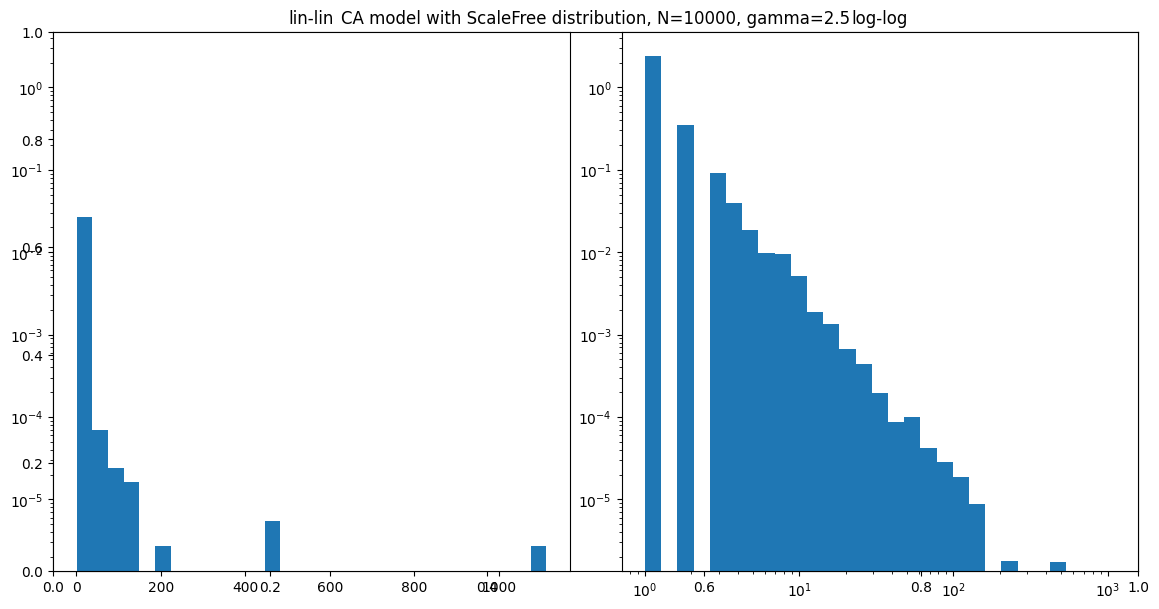

In [134]:
plothist_scalefree(CM_SF_10000_25,
          'CA model with ScaleFree distribution, N=10000, gamma=2.5')
plt.savefig('/content/drive/MyDrive/A2-networks/CM_SF_10000_25')

In [135]:
print('gamma: ', gamma)
gamma_est(CM_SF_10000_25)

gamma:  2.5
MLE gamma estimation, with k_min >= 1: -9.911864487232965
MLE gamma estimation, with k_min > 5: 5.633951018509934
Regression coefficient: -1.2823242293033015 , gamma: 2.2823242293033017


N = 10000, gamma = 3

In [136]:
N=10000
gamma=3
node_degrees=SF_even(N, gamma)
CM_SF_10000_3=CM(node_degrees)
nx.write_pajek(CM_SF_10000_3, "/content/drive/MyDrive/A2-networks/CM_SF_10000_3")


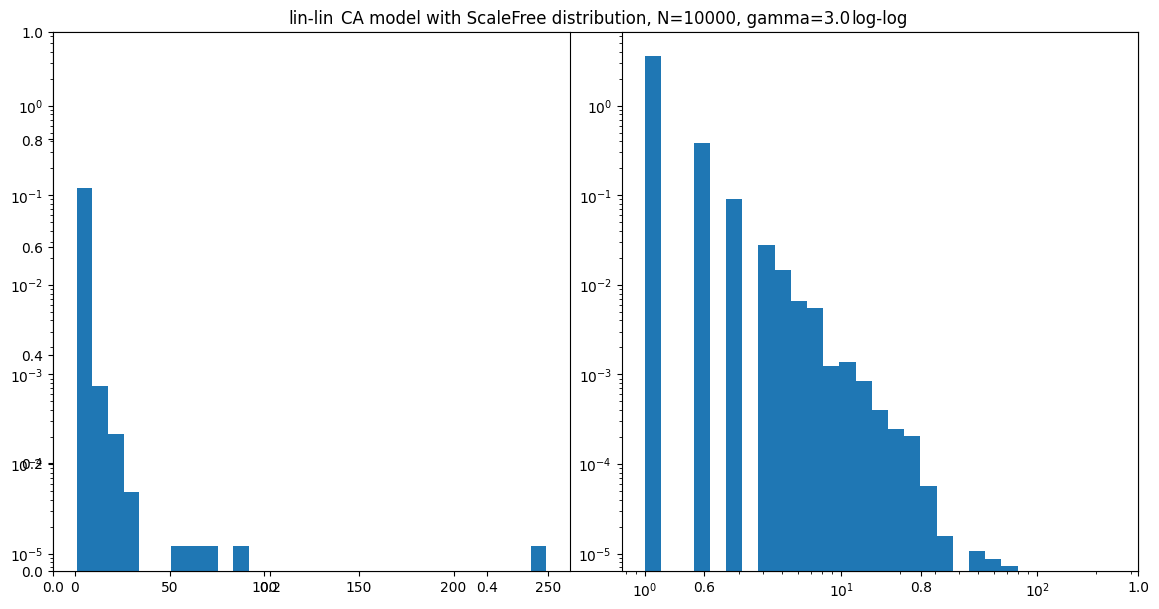

In [137]:
plothist_scalefree(CM_SF_10000_3,
          'CA model with ScaleFree distribution, N=10000, gamma=3.0')
plt.savefig('/content/drive/MyDrive/A2-networks/CM_SF_10000_3')

In [138]:
print('gamma: ', gamma)
gamma_est(CM_SF_10000_3)

gamma:  3
MLE gamma estimation, with k_min >= 1: -2.215665004161247
MLE gamma estimation, with k_min > 5: -16.933978295467067
Regression coefficient: -1.8462359674753752 , gamma: 2.8462359674753754


N = 10000, gamma = 3.5

In [139]:
N=10000
gamma=3.5
node_degrees=SF_even(N, gamma)
CM_SF_10000_35=CM(node_degrees)
nx.write_pajek(CM_SF_10000_35, "/content/drive/MyDrive/A2-networks/CM_SF_10000_35")


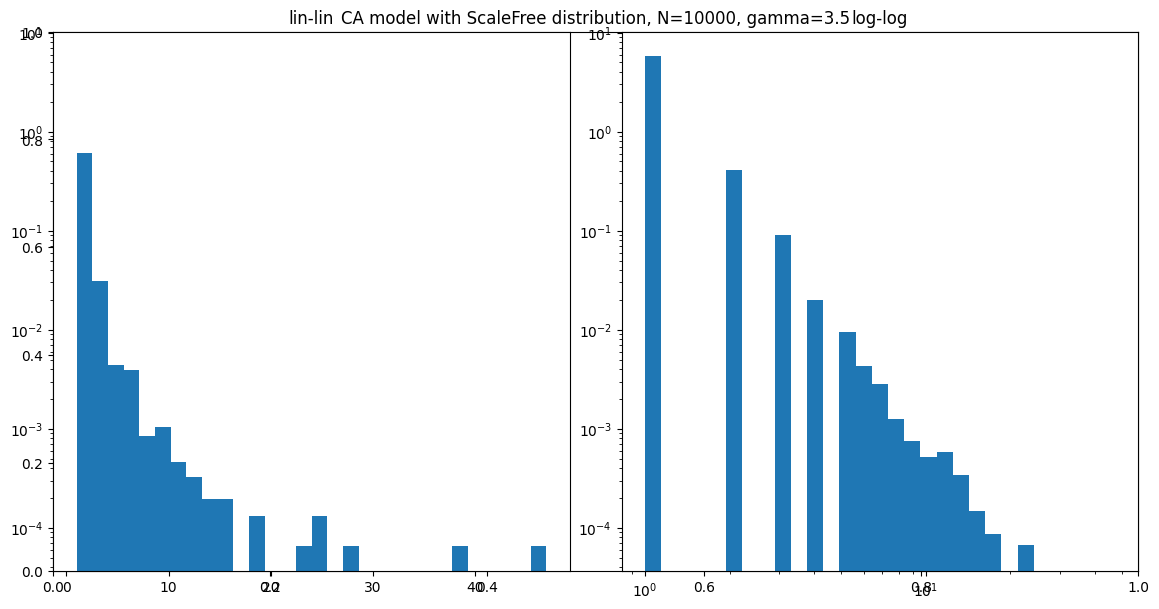

In [140]:
plothist_scalefree(CM_SF_10000_35,
          'CA model with ScaleFree distribution, N=10000, gamma=3.5')
plt.savefig('/content/drive/MyDrive/A2-networks/CM_SF_10000_35')

In [141]:
print('gamma: ', gamma)
gamma_est(CM_SF_10000_35)

gamma:  3.5
MLE gamma estimation, with k_min >= 1: -1.260094110224554
MLE gamma estimation, with k_min > 5: -6.092911094913975
Regression coefficient: -2.462858912945493 , gamma: 3.462858912945493
